In [1]:
# project: p1
# submitter: xyang467
# partner: none
# hours: 15

In [2]:
import json
import os
import copy
import pandas as pd
import re
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from subprocess import check_output,CalledProcessError,PIPE
import numpy as np
from time import time

In [3]:
#Q1
type(7/2)

float

In [4]:
#Q2
x = 4
maximum = 10
minimum = 5
error = (x<5)|(x>10) # True if x is outside the minimum-to-maximum range
error

True

In [5]:
#Q3
word = "KAFKAESQUE"
suffix_match = word.lower()[-5:] == "esque" # .endswith(...) method not allowed for this question! (practice slicing)
suffix_match

True

In [6]:
#Q4
def add(x,y=1):
    return(x+y)
add(3, 4)

7

In [7]:
#Q5
add(9)

10

In [8]:
#Q6
x = 4
if x<0:
    status = "negative"
elif x>0:
    status = "positive"
else:
    status = "zero"
status

'positive'

In [9]:
nums = [3, 4, 1, 6]
for x in nums:
    print(x)

3
4
1
6


In [10]:
#Q7
def smart_count(L):
    s = []
    for x in L:
        if x < 0:
            break
        elif x <= 10:
            s.append(x)
            continue
    return(sum(s))

smart_count(nums) 

14

In [11]:
#Q8
smart_count([2, 1, 11, 3, 15, -1, 8, 2])

6

In [12]:
#Q9
header = ["A", "B", "C"]

coord1 = {"x": 8, "y": 5}
coord2 = {"x": 9, "y": 2}
coord3 = {"x": 3, "y": 1}

rows = [
    [1, 6, coord1],
    [3, 4, coord2],
    [5, 2, coord3],
]
coord3["z"] = 3.14
rows

[[1, 6, {'x': 8, 'y': 5}],
 [3, 4, {'x': 9, 'y': 2}],
 [5, 2, {'x': 3, 'y': 1, 'z': 3.14}]]

In [13]:
#Q10
rows[0][-1]["x"]

8

In [14]:
#Q11
v2 = copy.copy(rows)
v2[0] = 8888    # first change
v2[1][1] = 9999 # second change
rows

[[1, 6, {'x': 8, 'y': 5}],
 [3, 9999, {'x': 9, 'y': 2}],
 [5, 2, {'x': 3, 'y': 1, 'z': 3.14}]]

In [15]:
#Q12
i = header.index("B")
s = []
for row in rows:
    s.append(row[i])
sum(s)

10007

In [16]:
#Q13
rows.sort(key=lambda row: row[header.index("B")], reverse=False)
rows

[[5, 2, {'x': 3, 'y': 1, 'z': 3.14}],
 [1, 6, {'x': 8, 'y': 5}],
 [3, 9999, {'x': 9, 'y': 2}]]

In [17]:
#Q14
#!wget http://www.floatrates.com/daily/usd.json
f = open("usd.json")
data = json.load(f)
f.close()
rate = data['eur']['rate']
400 * rate

349.347657205616

In [18]:
#Q15
def divide(x,y):
    try:
        return (x/y)
    except ZeroDivisionError:
        return (float("nan"))
divide(3, 2)

1.5

In [19]:
#Q16
divide(-3, 0)

nan

In [20]:
#Q17
file_list = os.listdir("home-computers")
years = dict()
for file in file_list:
    key = re.findall(r'\d\d\d\d',file.split(".")[0])
    data = pd.read_csv("home-computers/"+file, header = 1)
    value = pd.DataFrame(data)
    years[int(key[0])] = value.set_index("Geographic Area Name")
key_list = list(years.keys())
key_list.sort()
key_list

[2013, 2014, 2015, 2016, 2017, 2018]

In [21]:
#Q18
df = years[2018]
df.at["Wisconsin","Estimate!!Total"]

2371960

In [22]:
#Q19
s1 = df["Estimate!!Total!!No Computer"]
sum(s1)

10285814

In [23]:
#Q20
s2 = df["Margin of Error!!Total!!No Computer"]
s3 = s2 / s1
s3.max()

0.12375641594322287

In [24]:
#Q21
s4 = df["Estimate!!Total"]
s5 = 100*s1/s4
states = ["Illinois", "Indiana", "Iowa", "Michigan", "Minnesota", "Wisconsin"]
state_dict = {}
for s in states:
    state_dict[s] = s5.at[s]
state_dict

{'Illinois': 8.524143737625554,
 'Indiana': 9.463486214247707,
 'Iowa': 9.468929459023103,
 'Michigan': 8.936374942955922,
 'Minnesota': 7.491847623005652,
 'Wisconsin': 9.582497175331794}

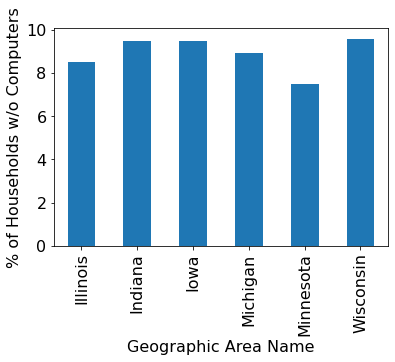

In [25]:
#Q22
plt.rcParams['font.size'] = '16'
s5[states].plot.bar()
plt.ylabel('% of Households w/o Computers')
plt.show()

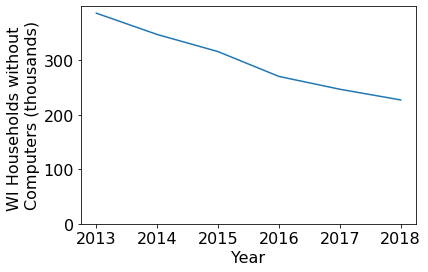

In [26]:
#Q23
x = []
y = []
for year in key_list:
    x.append(year)
    data = years[year]
    y.append(data["Estimate!!Total!!No Computer"].at["Wisconsin"]/1000)

fig, ax = plt.subplots()
plt.ylabel('WI Households without \nComputers (thousands)')
plt.xlabel('Year')
ax.yaxis.set_major_locator(MultipleLocator(100))
ax.set(ylim=(0,399))

plt.plot(x, y)
plt.show()

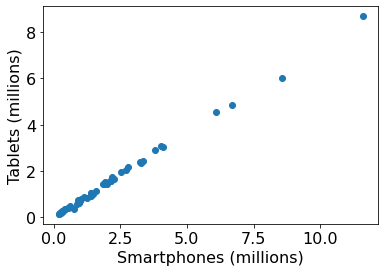

In [27]:
#Q24
x = 1/1000000*df["Estimate!!Total!!Has one or more types of computing devices!!Smartphone"]
y = 1/1000000*df["Estimate!!Total!!Has one or more types of computing devices!!Tablet or other portable wireless computer"]
plt.ylabel('Tablets (millions)')
plt.xlabel('Smartphones (millions)')
plt.scatter(x, y)
plt.show()

In [28]:
#Q25
check_output(["git", "checkout","main"], cwd="flask")
result = str(check_output(["git", "log"], cwd="flask"),encoding = "utf-8")
output = result.strip().split("\n")
output[0]

Previous HEAD position was 4ec7d2a0 Started working on documentation.
Switched to branch 'main'


'commit 660994efc761efdfd49ca442b73f6712dc77b6cf'

In [29]:
#Q26
commit_list = []
for line in output:
    if line[:7] == "commit ":
        commit_list.append(line[7:]) 
commit_list[-50:]

['7b5015010bc8c2a2d56c7c50b37e5b9facdad102',
 '40e0024d7b87150ed694829a5335bd2435962225',
 '6dd92ae4b32c336564231e10db12458a8b9261ca',
 '1246f4088a4fdc00a79f8029ff5d77bfe4fc9b14',
 'c4f5c2fb9afc1679c085500830bd53fab93ad885',
 '1d8432ebfd1637eacab79a15e9b7963bf061371c',
 'fc94599285aa1aec50b3c9426697249e55edda0a',
 'c33675f0251071ea47ce166b81ce8c637842f091',
 '2d9bb692728fd76b19e467499caa4f5fcb07aede',
 'ca520fb7e4c29afccc637e61c11429a0f3e8d5ad',
 '08f1f0dc32004fae01cf96d1eed84e6461e698e5',
 '8009bd986940378bba1399dbfce90d03e441467b',
 'a42728568e18bedf588be2357b56021ab85b9fad',
 '959b5df00431c436474c5abca304e631c0de7721',
 '4affedec356ad8c9e6a107578f03fc7f5c615064',
 'de03143f6ecf9a36dd32f16f07309c64d4de03b0',
 'a01e8b49ca66608f0bd46134ff02deeb5724c799',
 '36071ca1f42a26ef327e9d14e4909a8c92cd4fae',
 '51c9829a9cdfa2bf301431f686d7a404cc7c5083',
 '2f5a4f8dbc832b0daebcd66ea8b3969589191fa7',
 '03148dba6b26a2694da1d466584f50189c52e7b3',
 'ef524f2cfd65377b3b9ce896e7a710472b13c0f6',
 'f2dc38cd

In [30]:
#Q27
check_output(["git","checkout",commit_list[-3]], cwd="flask")
f = open("flask/README")
data = f.read()
f.close()
data

Note: switching to '4ec7d2a0d8eac4f915dc0d38a886cd57045bb0c4'.

You are in 'detached HEAD' state. You can look around, make experimental
changes and commit them, and you can discard any commits you make in this
state without impacting any branches by switching back to a branch.

If you want to create a new branch to retain commits you create, you may
do so (now or later) by using -c with the switch command. Example:

  git switch -c <new-branch-name>

Or undo this operation with:

  git switch -

Turn off this advice by setting config variable advice.detachedHead to false

HEAD is now at 4ec7d2a0 Started working on documentation.


"\n                        // Flask //\n\n     because a pocket knife is not the only thing that\n                    might come in handy\n\n\n    ~ What is Flask?\n\n      Flask is a microframework for Python based on Werkzeug\n      and Jinja2.  It's intended for small scale applications\n      and was development with best intentions in mind.\n\n   ~ Is it ready?\n\n      Nope, this is still work in progress, but I am happy to\n      accept patches and improvements already.\n"

In [31]:
#Q28
l = []
for line in output:
    keyline = re.findall("Merge pull request #\d+ from .+",line.strip())
    if keyline:
        keyword = keyline[0].split()[-1]
        keyname = keyword.split("/")[0]
        l.append(keyname)
occurence = {x:l.count(x) for x in l}
occurence

{'Yourun-proger': 2,
 'olliemath': 1,
 'pallets': 204,
 'jugmac00': 1,
 'pgjones': 14,
 'eprigorodov': 1,
 'HenryKobin': 1,
 'delicb': 1,
 'vinzid': 1,
 'karintou8710': 1,
 'kkirsche': 2,
 'matipau': 1,
 'Makonede': 1,
 'sprutner': 1,
 'Jalkhov': 1,
 'KPLauritzen': 1,
 'greyli': 42,
 'esadek': 1,
 'na2shell': 1,
 'Rohan-Salwan': 1,
 'default-303': 1,
 'awijaya22': 1,
 'starlightknown': 1,
 'yuxiaoy1': 4,
 'kaushikk25': 1,
 'Elahi-cs': 1,
 'Hugo0': 1,
 'dannysepler': 1,
 'rafaVls': 1,
 'brettlangdon': 1,
 'oleksis': 1,
 'andrewjroth': 1,
 'ThiefMaster': 11,
 'kangetsu121': 1,
 'mbpreble': 1,
 'tonydelanuez': 1,
 'elliott-king': 1,
 'huimingz': 1,
 'lielfr': 1,
 'tirkarthi': 3,
 'nphilipp': 1,
 'WolframAlph': 1,
 'MLH-Fellowship': 2,
 'MartinThoma': 1,
 'ebonnecab': 1,
 'jackwardell': 3,
 'jab': 3,
 'DeepOde': 1,
 'stat1c-void': 1,
 'lgiordani': 1,
 'iomintz': 1,
 'jeffwidman': 8,
 'kx-chen': 1,
 'jeenuv': 1,
 'pgkrit': 1,
 'valleygtc': 1,
 'shanavas786': 1,
 'mattc41190': 2,
 'gnumoksha

In [32]:
#Q29

try:
    check_output(["pip3", "instal"], stderr=PIPE)
except CalledProcessError as e:
    output = str(e.stderr, encoding = "utf-8")
output

'ERROR: unknown command "instal" - maybe you meant "install"\n'

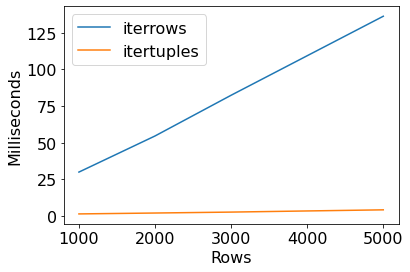

In [33]:
#Q30
def rand_df(rows):
    return pd.DataFrame(np.random.randint(10, size=(rows, 4)),
                        columns=["A", "B", "C", "D"],
                        index=[f"r{i}" for i in range(1, rows+1)])
times_df = pd.DataFrame(dtype=float)
for rows in range(1000,5001,1000):
    df = rand_df(rows) 
    t0 = time()
    for row in df.iterrows():
        pass
    t1 = time()
    times_df.at[rows, "iterrows"] = (t1 - t0) * 1000
    t2 = time()
    for row in df.itertuples():
        pass
    t3 = time()
    times_df.at[rows, "itertuples"] = (t3 - t2) * 1000
times_df.plot.line()
plt.ylabel('Milliseconds')
plt.xlabel('Rows')
plt.show()

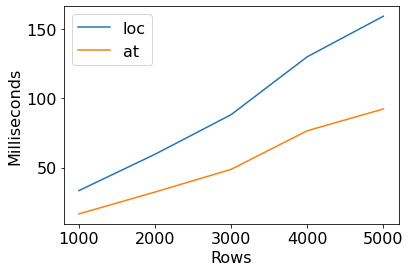

In [34]:
#Q31
times_df = pd.DataFrame(dtype=float)
for rows in range(1000,5001,1000):
    df = rand_df(rows) 
    t0 = time()
    total = 0
    for idx in df.index:
        for col in df.columns:
            total += df.loc[idx, col]
    t1 = time()
    times_df.at[rows, "loc"] = (t1 - t0) * 1000
    t2 = time()
    total = 0
    for idx in df.index:
        for col in df.columns:
            total += df.at[idx, col]
    t3 = time()
    times_df.at[rows, "at"] = (t3 - t2) * 1000
times_df.plot.line()
plt.ylabel('Milliseconds')
plt.xlabel('Rows')
plt.show()

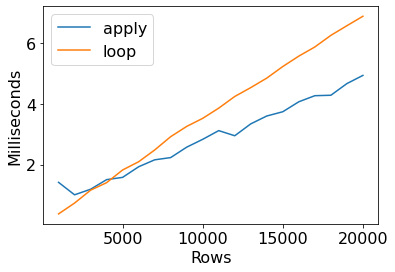

In [35]:
#Q32
def laugh(x):
    return "ha" * x
times_df = pd.DataFrame(dtype=float)
for rows in range(1000,20001,1000):
    df = rand_df(rows) 
    t0 = time()
    result = df["A"].apply(laugh).tolist()
    t1 = time()
    times_df.at[rows, "apply"] = (t1 - t0) * 1000
    t2 = time()
    result = []
    for val in df["A"]:
        result.append(laugh(val))
    t3 = time()
    times_df.at[rows, "loop"] = (t3 - t2) * 1000
times_df.plot.line()
plt.ylabel('Milliseconds')
plt.xlabel('Rows')
plt.show()